Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name below.

Rename this problem sheet as follows:

    ps{number of lab}_{your user name}_problem{number of problem sheet in this lab}
    
for example
    
    ps8_blja_problem3

Submit your homework until Thursday, December 17, 2020, 9 am.

In [1]:
NAME = "Ahmad Modabber"
EMAIL = "amod@tu-chemnitz.de"
USERNAME = "amod"

---

# Introduction to Data Science
## Lab 8: Cross-validation for a diabetes data set

### Part A: Importing the data set

The diabetes data set contains ten measurements (age, sex, body mass index, average blood pressure, and six blood serum measurements) for each of the `n = 442` patients.

The response variable is a quantitative measure of disease progression one year after baseline.

**Task**: The data set is part of scikit learn, you can import it by executing the next cell.

In [2]:
from sklearn import datasets
diabetes = datasets.load_diabetes()

Here, `diabetes` will be a dictionary.
A *dictionary* is an unordered collection of items.
While other compound data types have only `values` as elements (a *list* for example), a dictionary consists of `key: value` pairs.

**Task**: You can return the keys using the method `.keys()`.

In [3]:
diabetes.keys()

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename'])

Here, you find that the *dictionary* diabetes contains the keys

    'data', 'target', 'DESCR', 'feature_names', 'data_filename', 'target_filename'

Since `DESCR` sounds like description, we print its *value* by the following command
    
    print(diabetes.DESCR)

In [4]:
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, T-Cells (a type of white blood cells)
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, thyroid stimulating hormone
      - s5      ltg, lamotrigine
      - s6      glu, blood sugar level

Note: Each of these 10 feature va

Your first task will be to create a `pandas.DataFrame` to hold this information.

**Task (2 points)**:
Create a pandas data frame `X` holding the ten predictor variables. You should name the columns in the data frame using the optional argument `columns=cols`, where `cols` is given by
    
    cols = ["age", "sex", "bmi", "map", "tc",
            "ldl", "hdl", "tch", "ltg", "glu"]
            
Store the response variables as an numpy array `y`

**Hint**:
As in the iris data set, the diabetes data set is as a python dictionary.
The predictor variables can be accessed by `diabetes.data`, the responses via `diabetes.target`.

In [5]:
import pandas as pd
# YOUR CODE HERE
 
y = diabetes.target

cols = ["age", "sex", "bmi", "map", "tc", "ldl", "hdl", "tch", "ltg", "glu"]
X = pd.DataFrame(diabetes.data ,columns=cols)

X

,age,sex,bmi,map,tc,ldl,hdl,tch,ltg,glu
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930


In [6]:
assert X.shape == (442,10)
assert all(X.columns == ["age", "sex", "bmi", "map", "tc", "ldl", "hdl", "tch", "ltg", "glu"])
assert abs(X.age.mean()) < 1e-10

In the following, we want to try two different estimation approaches:
1. At first, we use a plain training-test set approach, where we exclude $1/5$ of the data from training.
2. Our second approach is to estimate $5$ different models using 5-fold cross-validation

### Part B: Simple splitting into training and validation set

In this part, we want to train a linear model using a subset of our samples.
We have done this by hand so far, but there are also methods provided by `sklearn` which will do this work for us.

Use the function `train_test_split` from the module `sklearn.model_selection` to divide your data inta a training and a validation set. SInce this selection is made randomly, you should set the optional input `random_state` to fix the seed of the random number generator to ensure comparability, e.g., by setting `random_state = 1`.

**Task (1 point)**: Split your data into a training and a test set using the function `train_test_split`.
Your *test set should contain 20\% of the data*.
Use `random_state=1`.
Store your sets in variables `X_train, X_test, y_train, y_test`.

In [7]:
# YOUR CODE HERE
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [8]:
assert X_train.shape == (353,10)
assert y_test.shape == (89,)
assert abs(y_test.mean() - 147.20224719101122) < 1e-8
assert abs(X_test.age.var() - 0.0023730443017513166) < 1e-8

**Task (1 point)**:
Fit a *LinearRegression model* to your **training** data.
Use the appropriate method from `sklearn`.

Use your model to predict the response on the test set and store your prediction in a variable `test_pred`.

In [9]:
# YOUR CODE HERE
from sklearn.linear_model import LinearRegression

model=LinearRegression()
model.fit(X_train,y_train)

test_pred = model.predict(X_test)

In [10]:
assert abs(test_pred.mean() - 143.7088817962804) < 1e-8

Until now, our plots were always of the type predictor against response or against regression line.
Another way to display the quality of a regression fit is to plot the true values against the predicted values.
The closer the values are to the identity $f(x) = x$, the better the fit.

**Task (2 points)**:
Produce a scatterplot of the true values in the validation response against the predicted values. Draw also a line corresponding to the *ideal prediction*, i.e., each prediction is equal to its true value.
Label the axes accordingly.

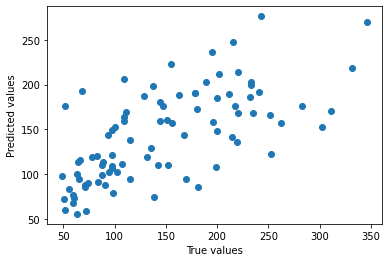

In [11]:
from matplotlib import pyplot as plt
%matplotlib inline
# YOUR CODE HERE
fig, ax = plt.subplots()
plt.scatter(y_test, test_pred)

ideal_pred = test_pred[y_test==test_pred]

# plt.legend()
plt.xlabel('True values')
plt.ylabel('Predicted values');


**Task (1 point)**: Compute the mean squared error $\text{MSE}_\text{val}$ on the validation set.
You can either use the method `mean_squared_error` from the module `sklearn.metrics`, or you can implement it by yourself.
Store the mean squared error in a variable `mse_test`.

In [12]:
# YOUR CODE HERE
from sklearn.metrics import mean_squared_error as MSE

mse_test = MSE(y_test, test_pred)
mse_test

2992.5576814529445

In [13]:
assert abs(mse_test - 2992.5576814529445) < 1e-8

**Task (1 point)**: What is the proportion of variability that is explained by this linear fit. Store your answer in a variable `expl_var`.

*Remember*: A `LinearRegression` has a method that computes exactly this.

In [14]:
# YOUR CODE HERE
expl_var = model.score(X_test,y_test)

In [15]:
assert abs(expl_var - 0.43843604017332694) < 1e-8

### Part C: K-Fold Cross-Validation

Next, we want to use cross-validation to select our model.
Scikit-learn is a powerful library and possesses numerous modules and functions.
Here, we explore the function `cross_val_score`, which can be imported by

    from sklearn.model_selection import cross_val_score
    
This function performs K-fold cross-validation and returns a score for each fold (this is the $R^2$-score by default).
    
**Task**: Please read the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html#sklearn.model_selection.cross_val_score) and import the function `cross_val_score`.

In [16]:
from sklearn.model_selection import cross_val_score

The functions expects as a first argument an `estimator`.
We are informed by the documentation that this should be an "estimator object implementing \[the method\] ‘fit’".

This is fulfilled by all estimation methods used so far (e.g. linear models, logistic regression, LDA).
In the case of a linear regression fit, this could be
    
    model = linear_model.LinearRegression()

**Task (1 point)**: Perform a 5-fold cross-validation for a linear model on the diabetes data set and print the scores.
Store the output of the function `cross_val_score` in a variable `cv_scores`.

In [17]:
# YOUR CODE HERE
from sklearn.linear_model import LinearRegression
model = LinearRegression()
cv_scores = cross_val_score(model, X, y, cv=5)

In [18]:
assert (cv_scores.mean() - 0.48231812211149394) < 1e-8

**Task (1 point)**: Use the function `cross_val_predict` in the module `sklearn.model_selection` to make prediction on the diabetes data set.
Store your answer in a variable `cv_pred`. Use again 5 folds.

In [19]:
# YOUR CODE HERE
from sklearn.model_selection import cross_val_predict 
cv_pred = cross_val_predict(model, X, y, cv=5)

In [20]:
assert cv_pred.shape == (442,)
assert abs(cv_pred.mean() - 151.7873610258396) < 1e-8

**Task (1 point)**: Make a scatterplot of the true values in the test response against the predicted values similar to the one in **Part B**, but now using all of the data. Label the axes.

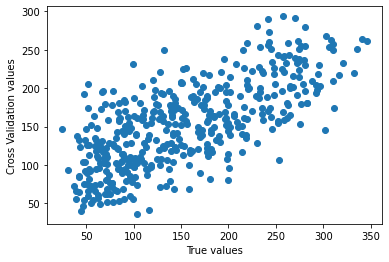

In [21]:
from matplotlib import pyplot as plt
%matplotlib inline
# YOUR CODE HERE
fig, ax = plt.subplots()
plt.scatter(y, cv_pred)

# plt.legend()
plt.xlabel('True values')
plt.ylabel('Cross Validation values');

**Task (1 point)**: Compute the $R^2$-score this model and store it in a variable `accuracy`. You can use the function `r2_score` from the module `sklearn.metrics`.

In [22]:
# YOUR CODE HERE
from sklearn.metrics import r2_score

accuracy = r2_score(y, cv_pred)
print("Cross-validated Accuracy:", accuracy)

Cross-validated Accuracy: 0.49532382463572844


In [23]:
assert abs(accuracy - 0.49532382463572844) < 1e-8

**Caution**: Altough this $R^2$-score is higher than the score for the training/validation set split, they are not really comparable since we computed them on different subsets of the data.
To get a more reliable comparison, we must keep part of the data as a so-called *hold-out* data set to be used for estimating the true learning error.